# Choosing region for oil well drill site

## Data preprocessing

In [3]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline

In [4]:
try:
    region_1 = pd.read_csv('/Users/anshilina/Documents/geo_data_0.csv')
    region_2 = pd.read_csv('/Users/anshilina/Documents/geo_data_1.csv')
    region_3 = pd.read_csv('/Users/anshilina/Documents/geo_data_2.csv')
except:
    region_1 = pd.read_csv('/datasets/geo_data_0.csv')
    region_2 = pd.read_csv('/datasets/geo_data_1.csv')
    region_3 = pd.read_csv('/datasets/geo_data_2.csv')

In [5]:
# function for fitting models and getting predictions

def model_fit(features_train, target_train, features_test, target_test, region_name):
    predictions = pd.DataFrame([])
    model = LinearRegression()
    model.fit(features_train, target_train)
    ind = features_test.index
    column_predictions = region_name + '_predictions'
    column_real_val = region_name + '_real_value'
    predictions[column_predictions] = model.predict(features_test)
    predictions.set_index(ind, inplace=True)
    predictions[column_real_val] = target_test
    return predictions

In [58]:
# function for calculating revenue

def revenue_calcilator(data, cost, count):
    data_sorted = data.sort_values(by=data.columns[0], ascending=False)[:count]
    return data_sorted[data.columns[1]].sum()*cost

In [6]:
# function for finding profit distribution

def bootstrap(data, iter_count, random_state):
    state = np.random.RandomState(random_state)
    values = []
    for i in range(iter_count):
        subsample_predictions = data.sample(GEOTAG_MAX, replace=True, random_state=state)
        values.append(revenue_calcilator(subsample_predictions, ONE_PROD, GEOTAG_BEST))
    return pd.Series(values)

Let's study data on first region. There are no missing values and duplicates in the data. The distribution of variables `f0` and` f2` is not normal, the variable `f1` is distributed normally.

In [7]:
display(region_1.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [8]:
region_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
region_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [10]:
print(f'Number of missing values in region 1: {region_1.isna().sum().sum()}')

Number of missing values in region 1: 0


In [11]:
print(f'Number of duplicates in region 1: {region_1.duplicated().sum()}')

Number of duplicates in region 1: 0


Let's study the distribution of variables.

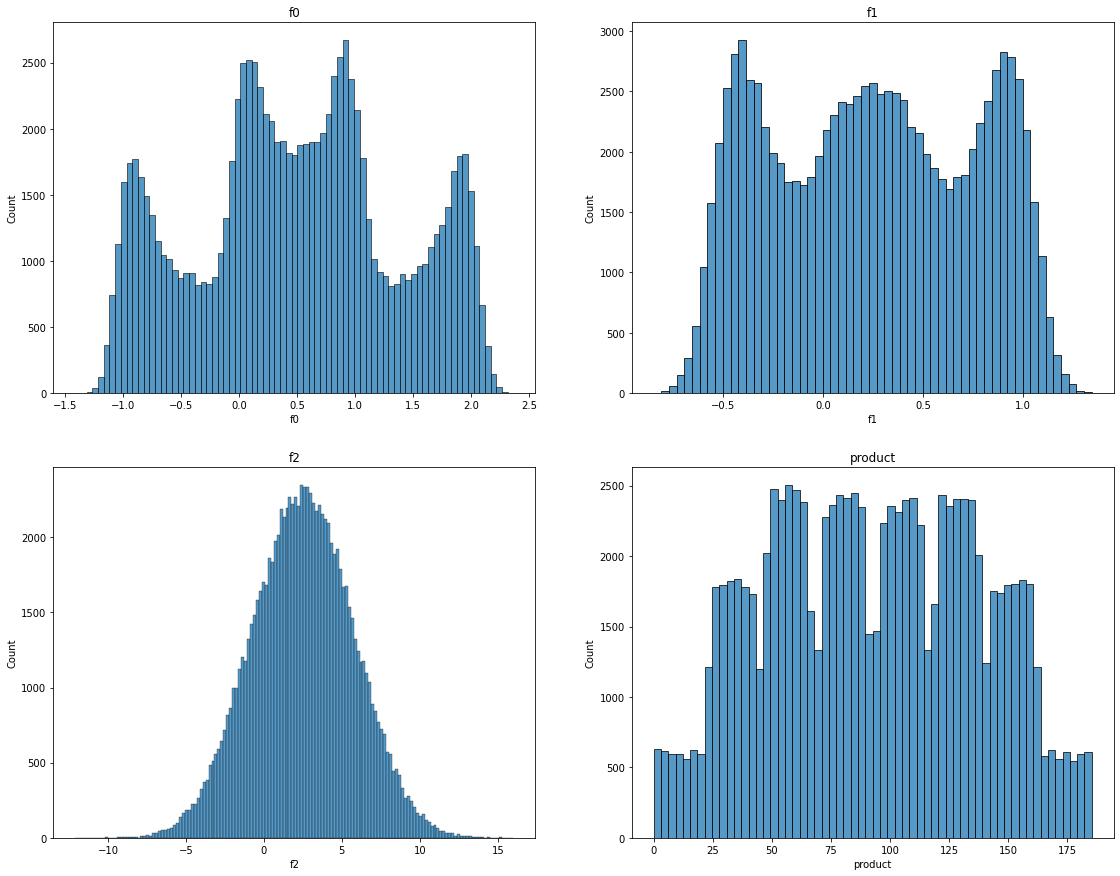

In [12]:
col_names = ['f0', 'f1', 'f2', 'product']
_, axs = plt.subplots(2, 2, figsize=(19,15))
axs = axs.ravel()

for i in range(len(col_names)):
    ax = axs[i]
    sns.histplot(ax=ax, x=region_1[col_names[i]], data=region_1)
    ax.tick_params(axis='x')
    ax.set_title(col_names[i])

Regarding region 2, there are also no missing values and duplicates. The variable `f1` is distributed normally, the distribution of the variable` f0` is bimodal. The variable `f2` is discrete and its' values are located from 0 to 5.

In [13]:
display(region_2.head())

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [14]:
region_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [15]:
region_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [16]:
print(f'Number of missing values in region 2: {region_2.isna().sum().sum()}')

Number of missing values in region 2: 0


In [17]:
print(f'Number of duplicates in region 2: {region_2.duplicated().sum()}')

Number of duplicates in region 2: 0


Let's study the distribution of variables.

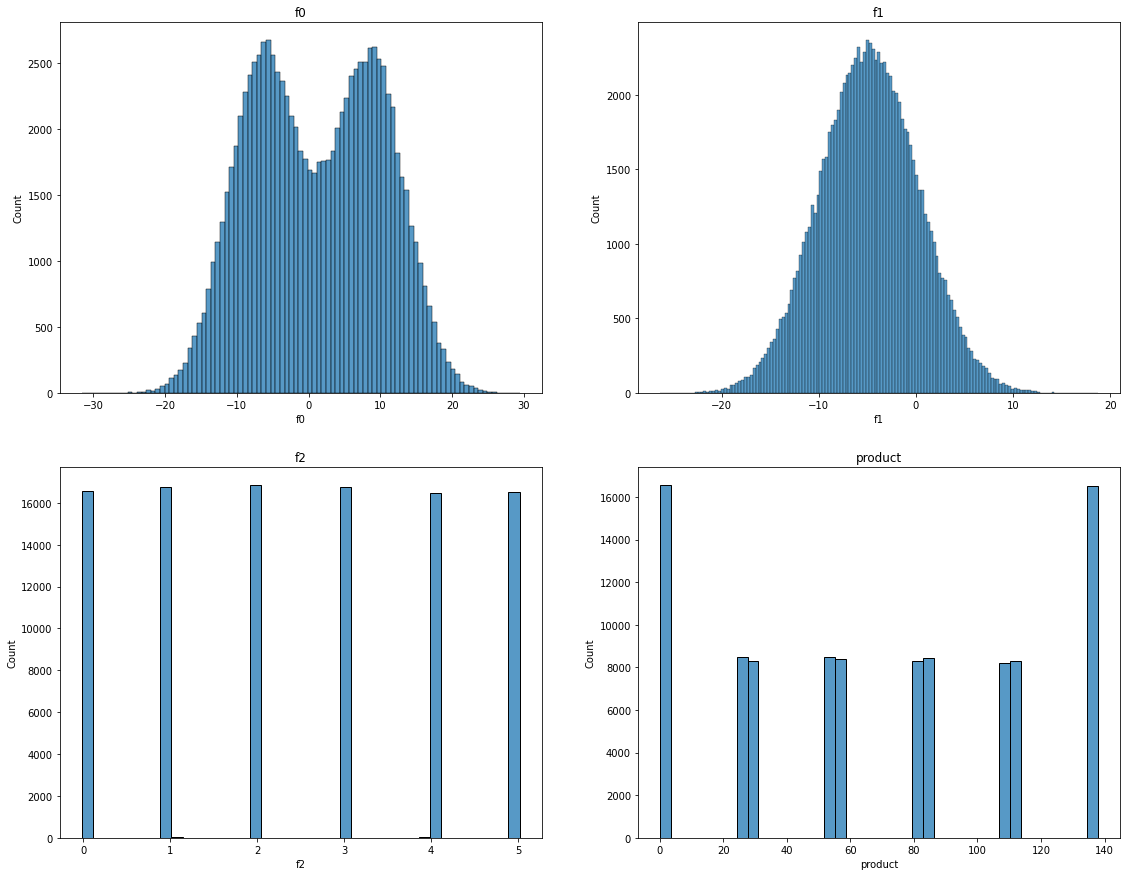

In [18]:
col_names = ['f0', 'f1', 'f2', 'product']
_, axs = plt.subplots(2, 2, figsize=(19,15))
axs = axs.ravel()

for i in range(len(col_names)):
    ax = axs[i]
    sns.histplot(ax=ax, x=region_2[col_names[i]], data=region_2)
    ax.tick_params(axis='x')
    ax.set_title(col_names[i])

Finally, let's study data on region 3. There are no missing values and duplicates. Vriables `f0`,` f1`, `f2` are distributed normally. 

In [19]:
display(region_3.head())

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [20]:
region_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [21]:
region_3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [22]:
print(f'Number of missing values in region 3: {region_3.isna().sum().sum()}')

Number of missing values in region 3: 0


In [23]:
print(f'Number of duplicates in region 3: {region_3.duplicated().sum()}')

Number of duplicates in region 3: 0


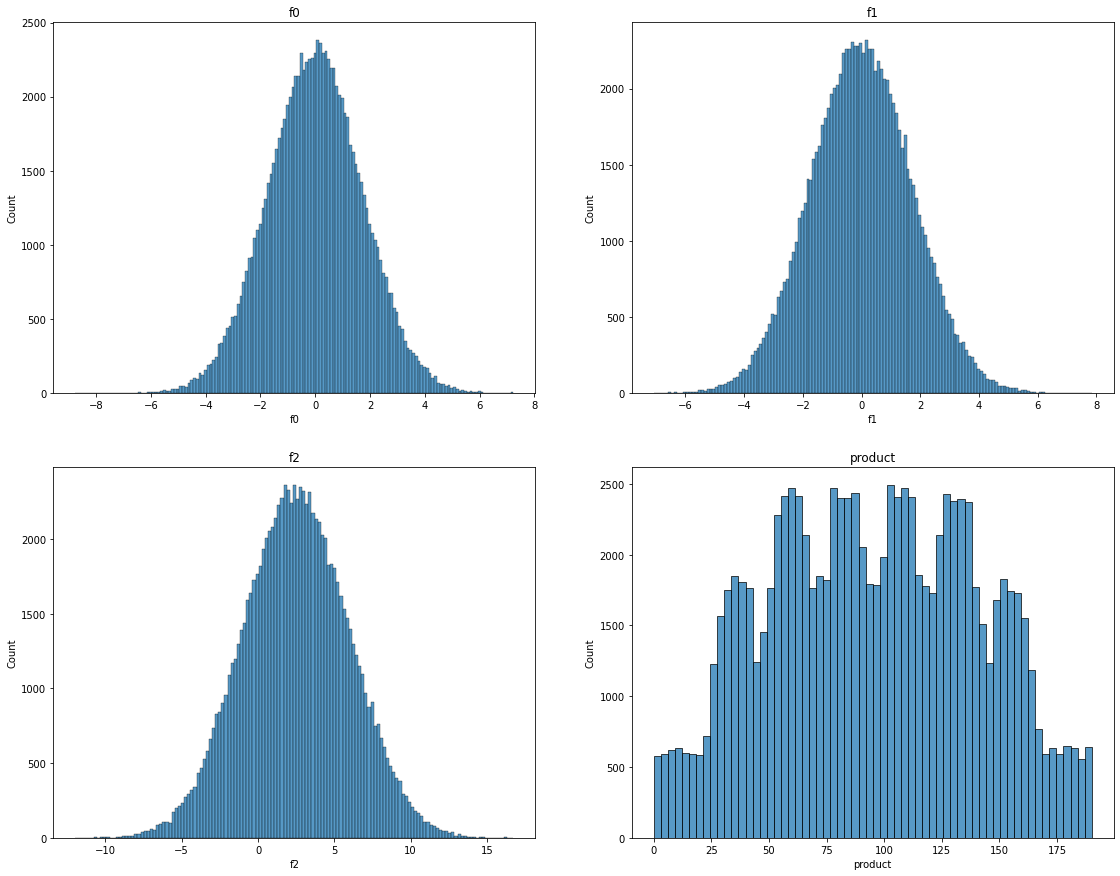

In [24]:
col_names = ['f0', 'f1', 'f2', 'product']
_, axs = plt.subplots(2, 2, figsize=(19,15))
axs = axs.ravel()

for i in range(len(col_names)):
    ax = axs[i]
    sns.histplot(ax=ax, x=region_3[col_names[i]], data=region_3)
    ax.tick_params(axis='x')
    ax.set_title(col_names[i])

## Models fitting

In this research, linear regression models were used to predict product volume in each region. $R^{2}$, $MAE$, $MSE$ were calculated to track the quality, predictions and real values were collected in a separate data frames. In addition, the average volume of predicted raw materials was calculated.

### Region 1

Let's split sample into training and test in proportion 75:25.

In [25]:
features_1, target_1 = region_1.drop(['product', 'id'], axis=1), region_1['product']

features_train_1, features_test_1, target_train_1, target_test_1 = train_test_split(
    features_1, target_1, test_size=0.25, random_state=42)

print(features_train_1.shape, target_train_1.shape)
print(features_test_1.shape, target_test_1.shape)

(75000, 3) (75000,)
(25000, 3) (25000,)


We check quality (R2 score) of the model using `cross_val_score`. According to the results, model does not predict production well.

In [27]:
model_region_1 = LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
print('R2:', (cross_val_score(model_region_1, features_1, target_1, cv=folds, scoring='r2')).mean())

R2: 0.27559485299967973


We use our own function that was initialized at the beginning to save predictions in `predictions_1`.

In [51]:
predictions_1 = model_fit(features_train_1, target_train_1, features_test_1, target_test_1, '1')
display(predictions_1)

,1_predictions,1_real_value
75721,101.901017,122.073350
80184,78.217774,48.738540
19864,115.266901,131.338088
76699,105.618618,88.327757
92991,97.980185,36.959266
...,...,...
21271,105.076959,148.821520
34014,74.768176,123.454003
81355,82.544397,91.945213
65720,81.826689,149.295563


In [29]:
mean_region_1 = predictions_1['1_predictions'].mean()
print(f'Average volume of predicted raw materials: {round(mean_region_1)}')

Average volume of predicted raw materials: 92


In [31]:
print('MAE:', mean_absolute_error(predictions_1['1_real_value'], predictions_1['1_predictions']))
print('RMSE:', mean_squared_error(predictions_1['1_real_value'], predictions_1['1_predictions'])**.5)

MAE: 31.047681538788186
RMSE: 37.75660035026169


### Region 2

In [32]:
features_2, target_2 = region_2.drop(['product', 'id'], axis=1), region_2['product']

features_train_2, features_test_2, target_train_2, target_test_2 = train_test_split(
    features_2, target_2, test_size=0.25, random_state=42)

print(features_train_2.shape, target_train_2.shape)
print(features_test_2.shape, target_test_2.shape)

(75000, 3) (75000,)
(25000, 3) (25000,)


R2 score is close to 1 – quality of the model is good.

In [33]:
model_region_2 = LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
print('R2:', cross_val_score(model_region_2, features_2, target_2, cv=folds, scoring='r2').mean())

R2: 0.9996243783357086


Let's save predictions and real values in `predictions_2`.

In [34]:
predictions_2 = model_fit(features_train_2, target_train_2, features_test_2, target_test_2, '2')
display(predictions_2)

,2_predictions,2_real_value
75721,0.844738,0.000000
80184,52.921612,53.906522
19864,135.110385,134.766305
76699,109.494863,107.813044
92991,-0.047292,0.000000
...,...,...
21271,108.351600,107.813044
34014,53.604049,53.906522
81355,26.708734,26.953261
65720,109.823087,110.992147


In [35]:
mean_region_2 = predictions_2['2_predictions'].mean()
print(f'Average volume of predicted raw materials: {round(mean_region_2)}')

Average volume of predicted raw materials: 69


In [37]:
print('MAE:', mean_absolute_error(predictions_2['2_real_value'], predictions_2['2_predictions']))
print('RMSE:', mean_squared_error(predictions_2['2_real_value'], predictions_2['2_predictions'])**.5)

MAE: 0.7170119535682558
RMSE: 0.8902801001028845


### Region 3

In [38]:
features_3, target_3 = region_3.drop(['product', 'id'], axis=1), region_3['product']

features_train_3, features_test_3, target_train_3, target_test_3 = train_test_split(
    features_3, target_3, test_size=0.25, random_state=42)

print(features_train_3.shape, target_train_3.shape)
print(features_test_3.shape, target_test_3.shape)

(75000, 3) (75000,)
(25000, 3) (25000,)


The quality of the model is low. R2 score is close to 0.

In [39]:
model_region_3 = LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
print('R2:', cross_val_score(model_region_3, features_3, target_3, cv=folds, scoring='r2').mean())

R2: 0.1986806467435085


Let's save predictions and real value in `predictions_3`.

In [40]:
predictions_3 = model_fit(features_train_3, target_train_3, features_test_3, target_test_3, '3')
display(predictions_3)

,3_predictions,3_real_value
75721,98.301916,117.441301
80184,101.592461,47.841249
19864,52.449099,45.883483
76699,109.922127,139.014608
92991,72.411847,84.004276
...,...,...
21271,102.764169,40.797226
34014,93.431823,87.144239
81355,64.098390,52.039812
65720,83.764135,136.961454


In [41]:
mean_region_3 = predictions_3['3_predictions'].mean()
print(f'Average volume of predicted raw materials: {round(mean_region_3)}')

Average volume of predicted raw materials: 95


In [42]:
print('MAE:', mean_absolute_error(predictions_3['3_real_value'], predictions_3['3_predictions']))
print('RMSE:', mean_squared_error(predictions_3['3_real_value'], predictions_3['3_predictions'])**.5)

MAE: 32.89695861057806
RMSE: 40.14587231134218


**Summary:** The best MAE (0.72) and RMSE (0.89) scores was aquired from the linear regression model fitted on data from 2 region. MAE and RMSE for model, fitted on data from the 1 region are 31.05 and 37.76 respectively – values that are less that 25th percentile of the `product` variable. However, R2 score is close to the 0. Regarding 3 region, MAE is 32.9, RMSE - 40.15, values that are also less than the 25th percentile of the `product` variable.

## Preparations for revenue calculation

Let's create variables for key values. We need to generate a sample of 500 values (`GEOTAG_MAX`) from which we will choose the 200 locations with the best predictions (`GEOTAG_BEST`). In addition, we are limited in budget – up to 10 billion (`BUDGET`), and in cost of one unit of the product (`ONE_PROD`).

In [45]:
GEOTAG_MAX = 500
GEOTAG_BEST = 200
BUDGET = 10000000000
ONE_PROD = 450000

Next, we will calculate the volume of raw materials that is sufficient for developing a new well

In [46]:
goal_quantity = BUDGET/(ONE_PROD*GEOTAG_BEST)
print(f'To develop a new well {round(goal_quantity)} raw material barrels are needed.')

To develop a new well 111 raw material barrels are needed.


Now, let's calculate how much raw material barrels are produced on average in each region according to the predictions of the model.

In [48]:
print(f'In 1 region, {round(mean_region_1)} raw material barrels are produced.')
print(f'In 2 region, {round(mean_region_2)} raw material barrels are produced.')
print(f'In 3 region, {round(mean_region_3)} raw material barrels are produced.')

In 1 region, 92 raw material barrels are produced.
In 2 region, 69 raw material barrels are produced.
In 3 region, 95 raw material barrels are produced.


**Summary:** According to the predictions of models, on average, in all regions, there is not enough raw materials for starting the development of a new well. The 3 region shows the best result. The 2 region has the lowest indicators.

## Revenue and risks calculation

To calculate revenue that could be acquired from the best locations in each of three regions we created special function. This function selects locations with maximum predictions in the region. Then it summarizes the real volume of raw materials that was extracted at these locations. As a result, by multiplying the cost of one raw material barrel by the total amount of extracted barrels we get total revenue in each particular region. The function was initialized at the beginning.

We will find the distribution of profits using bootstrap sampling. The function for bootstrap sampling was also initialized at the beginning.

For each region, we will calculate the risks and average profit. Then, we will find the 95% confidence interval for the sample average.

In [59]:
values_1 = bootstrap(predictions_1, 1000, 42) # прибыль
income_1 = values_1 - BUDGET # выручка
income_1_mean = income_1.mean()
lower_1 = income_1.quantile(0.025)
upper_1 = income_1.quantile(0.975)

print('Mean income:', income_1_mean)
print('Lower boundary of the 95% confidence interval:', lower_1)
print('Upper boundary of the 95% confidence interval:', upper_1)

risk_1 = sum([1 for i in income_1 if i < 0])/len(income_1)
print('Negative profit margin:', risk_1) 

Mean income: 399575478.05422896
Lower boundary of the 95% confidence interval: -110467895.33197226
Upper boundary of the 95% confidence interval: 897460327.7178793
Negative profit margin: 0.06


In [61]:
values_2 = bootstrap(predictions_2, 1000, 42) # прибыль
income_2 = values_2 - BUDGET # выручка
income_2_mean = income_2.mean()
lower_2 = income_2.quantile(0.025)
upper_2 = income_2.quantile(0.975)

print('Mean income:', income_2_mean)
print('Lower boundary of the 95% confidence interval:', lower_2)
print('Upper boundary of the 95% confidence interval:', upper_2)

risk_2 = sum([1 for i in income_2 if i < 0])/len(income_2)
print('Negative profit margin:', risk_2)

Mean income: 452048890.9064584
Lower boundary of the 95% confidence interval: 61684479.65422669
Upper boundary of the 95% confidence interval: 845340177.5073848
Negative profit margin: 0.015


In [63]:
values_3 = bootstrap(predictions_3, 1000, 42)  # прибыль
income_3 = values_3 - BUDGET # выручка
income_3_mean = income_3.mean()
lower_3 = income_3.quantile(0.025)
upper_3 = income_3.quantile(0.975)

print('Mean income:', income_3_mean)
print('Lower boundary of the 95% confidence interval:', lower_3)
print('Upper boundary of the 95% confidence interval:', upper_3)

risk_3 = sum([1 for i in income_3 if i < 0])/len(income_3)
print('Negative profit margin:', risk_3)

Mean income: 375009902.91532844
Lower boundary of the 95% confidence interval: -144766727.3048927
Upper boundary of the 95% confidence interval: 888390403.5342213
Negative profit margin: 0.08


## Conclusion

Model shows the best result on data from the second region. Negative profit margin is less than 2.5% only in the region 2. Therefore, risk of receiving negative profit is the least in second region. That is why it is proposed to consider region 2 as a location for the development of new wells.